In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [16]:
df =  pd.read_csv("arabica_data_cleaned.csv")

In [17]:
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [18]:
df.shape

(1311, 44)

In [19]:
df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [20]:
df.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                148
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

In [21]:
df.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [22]:
numeric_columns = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
    'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
    'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
    'Quakers', 'Category.Two.Defects',
    'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'
]


In [23]:
df_numeric = df[numeric_columns].dropna()


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [25]:
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps needs tuning
clusters = dbscan.fit_predict(X_scaled)

df_numeric['Cluster'] = clusters

In [26]:
print(df_numeric['Cluster'].value_counts())


Cluster
 0    868
-1    210
 1      5
Name: count, dtype: int64


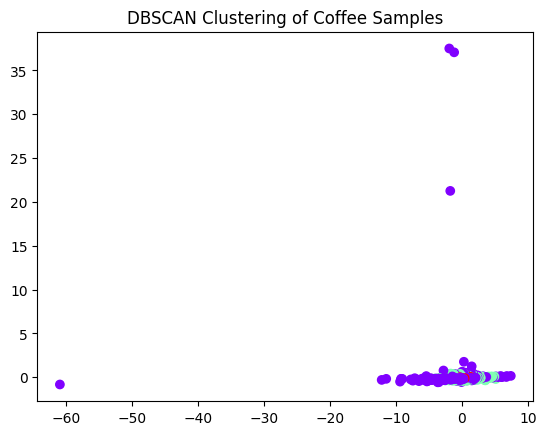

In [27]:



pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='rainbow')
plt.title("DBSCAN Clustering of Coffee Samples")
plt.show()
